In [4]:
## Lets import the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [5]:
## Mounting the google drive for the train and test data (Images)
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
## Here, we are giving the path of the train and test data which are on the mounted google drive
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Melanoma Assignment/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Melanoma Assignment/Test")

In [7]:
## Let us check the number of images under train and test data
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

728
12


In [8]:
## Defining some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

In [9]:
## We are splitting the data as 80% Train and 20% Validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 804 files belonging to 9 classes.
Using 644 files for training.


In [10]:
## Make sure to resize the image
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 848 files belonging to 9 classes.
Using 169 files for validation.


In [12]:
## From the given data, let us check the classes of skin cancer on the data
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


IndexError: ignored

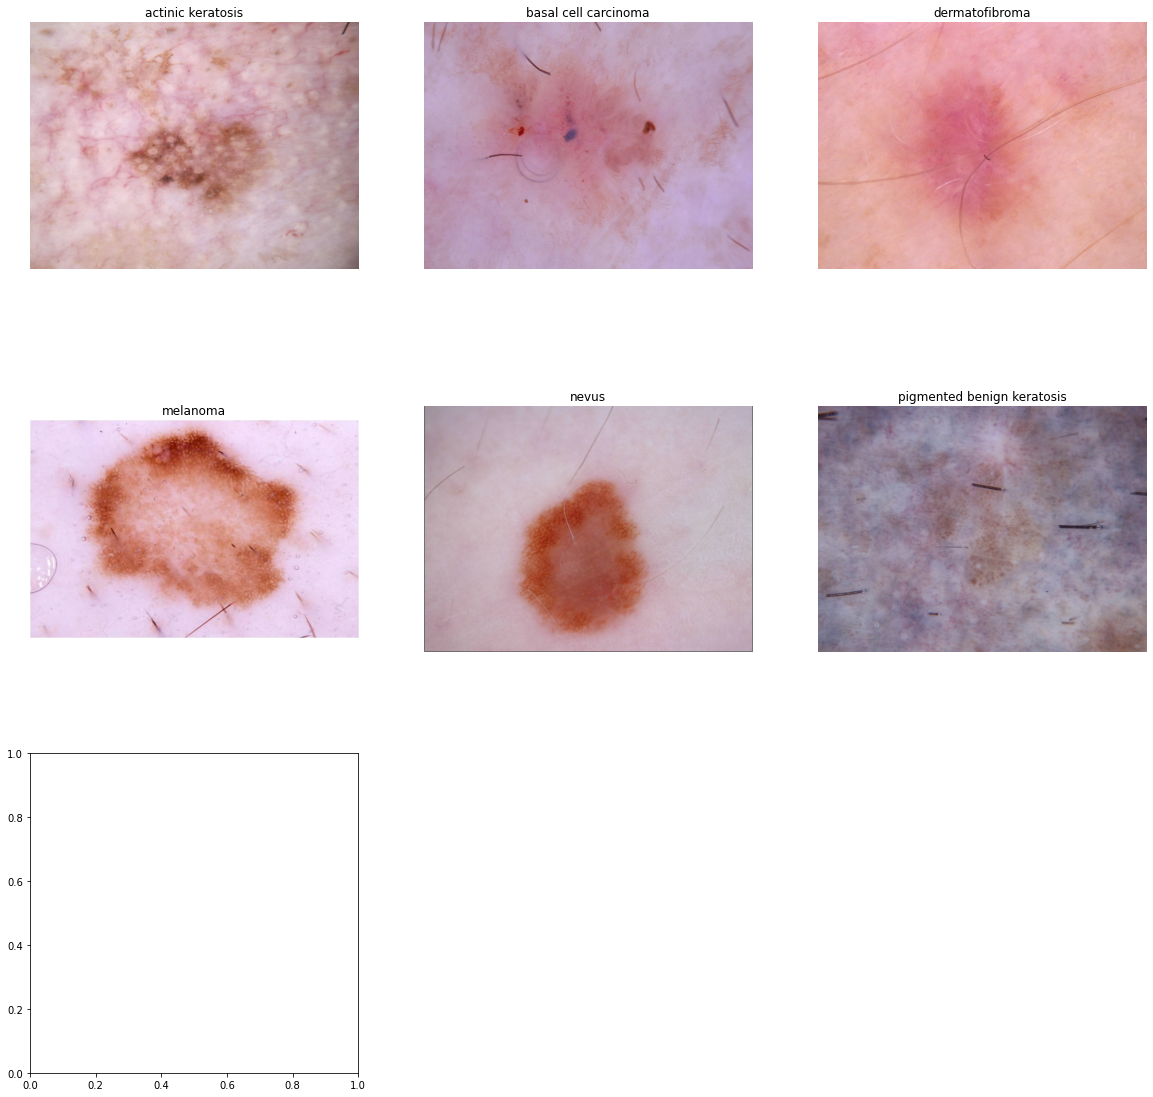

In [18]:
## Here, we are going to see one image from every category 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[19]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis("off")

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
## Here we are going to create a CNN model
from keras.layers import MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))

In [21]:
## Lets compile the model, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# Summary of the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [ ]:
## Let us train the model now

In [23]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 167s 4s/step - loss: 1.4668 - accuracy: 0.4472 - val_loss: 1.3188 - val_accuracy: 0.4734
Epoch 2/30
21/21 [==============================] - 64s 3s/step - loss: 1.3121 - accuracy: 0.4752 - val_loss: 1.3872 - val_accuracy: 0.5325
Epoch 3/30
21/21 [==============================] - 64s 3s/step - loss: 1.2684 - accuracy: 0.5373 - val_loss: 1.2716 - val_accuracy: 0.5858
Epoch 4/30
21/21 [==============================] - 66s 3s/step - loss: 1.1760 - accuracy: 0.5885 - val_loss: 1.3158 - val_accuracy: 0.4793
Epoch 5/30
21/21 [==============================] - 64s 3s/step - loss: 1.2736 - accuracy: 0.5342 - val_loss: 1.1224 - val_accuracy: 0.5799
Epoch 6/30
21/21 [==============================] - 63s 3s/step - loss: 1.0616 - accuracy: 0.6056 - val_loss: 1.1490 - val_accuracy: 0.6095
Epoch 7/30
21/21 [==============================] - 64s 3s/step - loss: 0.9966 - accuracy: 0.6227 - val_loss: 1.0111 - val_accuracy: 0.5917
Epoch 8/30
21/21 [============

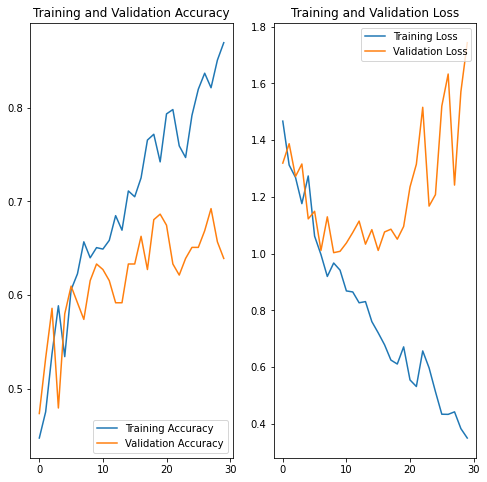

In [24]:
## Now that the model is trained, lets visualize the training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
## Write the findgins
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.15, 0.15), width_factor=(0.15, 0.15), fill_mode='reflect')
])

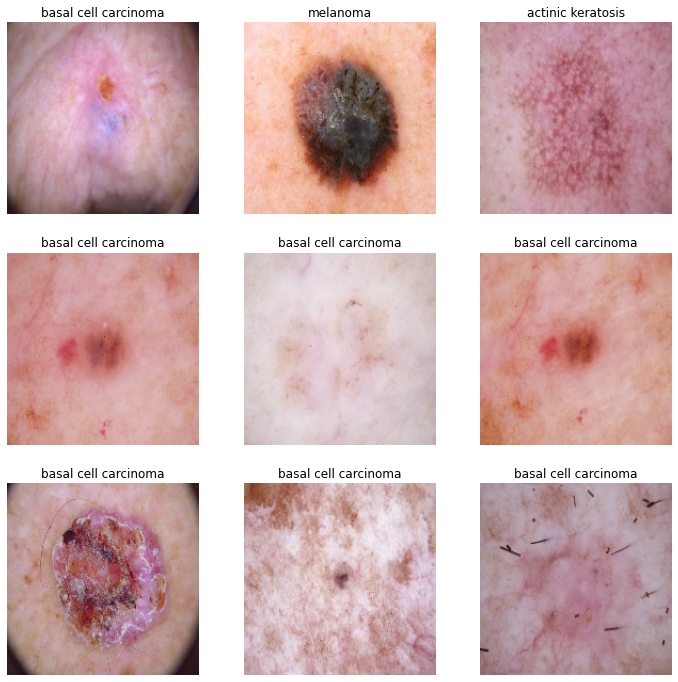

In [26]:
## Visualize how augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [27]:
## We can drop out layers if model is over fitting

## Your code goes here
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [28]:
## We again need to compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
## summary of all layers
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 activation (Activation)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                      

In [30]:
##  After compiling, we need to train the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 121s 6s/step - loss: 24.6172 - accuracy: 0.5109 - val_loss: 9.1453 - val_accuracy: 0.4734
Epoch 2/30
21/21 [==============================] - 116s 6s/step - loss: 16.0712 - accuracy: 0.5326 - val_loss: 8.8126 - val_accuracy: 0.1716
Epoch 3/30
21/21 [==============================] - 114s 6s/step - loss: 9.9891 - accuracy: 0.5357 - val_loss: 11.3683 - val_accuracy: 0.4734
Epoch 4/30
21/21 [==============================] - 113s 5s/step - loss: 6.2052 - accuracy: 0.5621 - val_loss: 13.7613 - val_accuracy: 0.4734
Epoch 5/30
21/21 [==============================] - 115s 6s/step - loss: 4.8802 - accuracy: 0.5761 - val_loss: 3.2820 - val_accuracy: 0.4734
Epoch 6/30
21/21 [==============================] - 113s 5s/step - loss: 4.0581 - accuracy: 0.5901 - val_loss: 18.9956 - val_accuracy: 0.1124
Epoch 7/30
21/21 [==============================] - 116s 6s/step - loss: 4.1120 - accuracy: 0.6071 - val_loss: 10.4354 - val_accuracy: 0.4793
Epoch 8/30
21/21 [

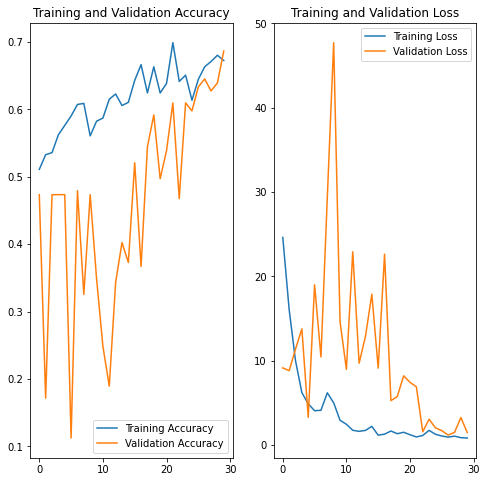

In [31]:
## Let us visualize the trained model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<BarContainer object of 9 artists>

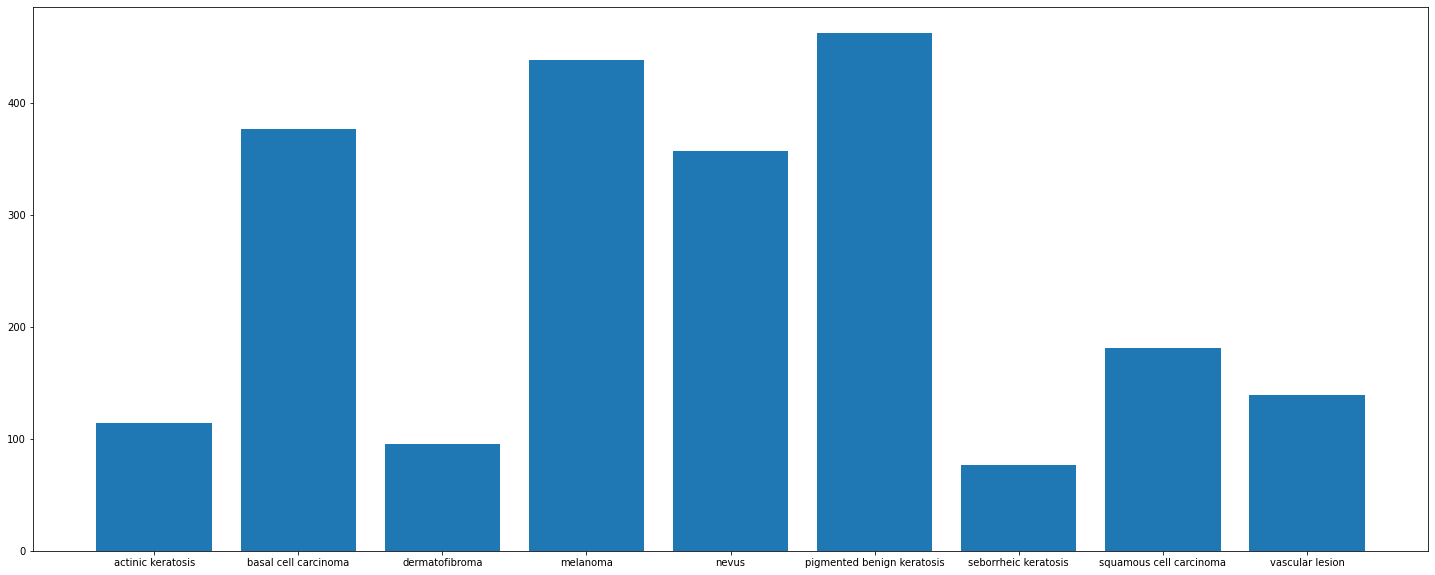

In [32]:
## Checking the class distribution in the data
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [33]:
## To rectify the class imbalance we use the package known as Augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
path_to_training_dataset="/content/gdrive/MyDrive/Melanoma Assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/Melanoma Assignment/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA8125E6550>: 100%|██████████| 500/500 [00:46<00:00, 10.79 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA8126B1790>: 100%|██████████| 500/500 [00:42<00:00, 11.78 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FA8125DAD10>: 100%|██████████| 500/500 [00:45<00:00, 10.97 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA812659950>: 100%|██████████| 500/500 [00:43<00:00, 11.55 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA81164AF10>: 100%|██████████| 500/500 [00:48<00:00, 10.22 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FA812E1AFD0>: 100%|██████████| 500/500 [00:47<00:00, 10.53 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA811669E90>: 100%|██████████| 500/500 [00:44<00:00, 11.35 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA812DB30D0>: 100%|██████████| 500/500 [00:46<00:00, 10.81 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA812F09BD0>: 100%|██████████| 500/500 [00:47<00:00, 10.43 Samples/s]


In [36]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/Melanoma Assignment/Train/output/")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [37]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,actinic keratosis
1,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,actinic keratosis
2,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,actinic keratosis
3,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,actinic keratosis
4,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,vascular lesion
4496,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,vascular lesion
4497,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,vascular lesion
4498,/content/gdrive/MyDrive/Melanoma Assignment/Tr...,vascular lesion


In [38]:
## Let us see the distribution of augmented data after adding new images to the dataset
new_df['Label'].value_counts()

pigmented benign keratosis    901
melanoma                      900
basal cell carcinoma          772
nevus                         680
squamous cell carcinoma       377
vascular lesion               284
actinic keratosis             216
dermatofibroma                202
seborrheic keratosis          168
Name: Label, dtype: int64

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
## Creating a training dataset
data_dir_train="/content/gdrive/MyDrive/Melanoma Assignment/Train/output"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [41]:
## Creating a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [42]:
## Creating a model (Including normalization)

from keras.layers import MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [43]:
## Let us compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
## Let us train the model
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 653s 6s/step - loss: 18.6866 - accuracy: 0.3044 - val_loss: 4.2884 - val_accuracy: 0.2022
Epoch 2/30
113/113 [==============================] - 638s 6s/step - loss: 3.6796 - accuracy: 0.3431 - val_loss: 52.5893 - val_accuracy: 0.1956
Epoch 3/30
113/113 [==============================] - 634s 6s/step - loss: 2.1411 - accuracy: 0.3550 - val_loss: 16.6934 - val_accuracy: 0.2211
Epoch 4/30
113/113 [==============================] - 636s 6s/step - loss: 1.7761 - accuracy: 0.4122 - val_loss: 11.6663 - val_accuracy: 0.3167
Epoch 5/30
113/113 [==============================] - 645s 6s/step - loss: 1.6453 - accuracy: 0.4428 - val_loss: 2.0628 - val_accuracy: 0.5189
Epoch 6/30
113/113 [==============================] - 632s 6s/step - loss: 1.5401 - accuracy: 0.4694 - val_loss: 2.5948 - val_accuracy: 0.5133
Epoch 7/30
113/113 [==============================] - 635s 6s/step - loss: 1.4989 - accuracy: 0.4853 - val_loss: 2.9949 - val_accuracy: 0.5122
Epoch 

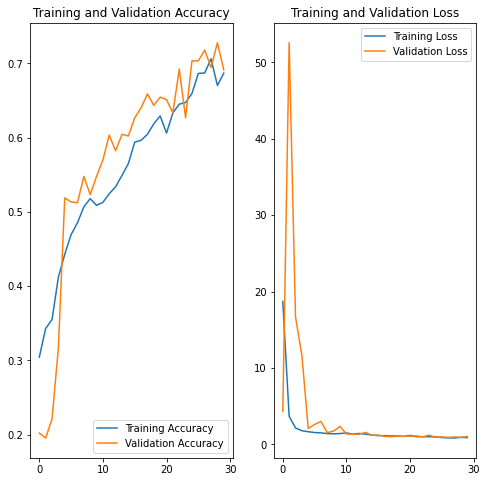

In [45]:
## Visualizing the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()